# Análise de agrupamento no Python usando *scipy* e *scikitlearn*

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(style='whitegrid')
import altair as alt # pacote para outros tipos de gráficos

# ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# AA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import KMeans

# Exemplo simples: 6 pessoas (duas variáveis: idade e renda)

In [2]:
dados = pd.DataFrame({'individuo': [1, 2, 3, 4, 5, 6],
                      'renda': [9.60, 8.40, 2.40, 18.20, 3.90, 6.40],
                      'idade': [28, 31, 42, 38, 25, 41]})
dados

,individuo,renda,idade
0,1,9.6,28
1,2,8.4,31
2,3,2.4,42
3,4,18.2,38
4,5,3.9,25
5,6,6.4,41


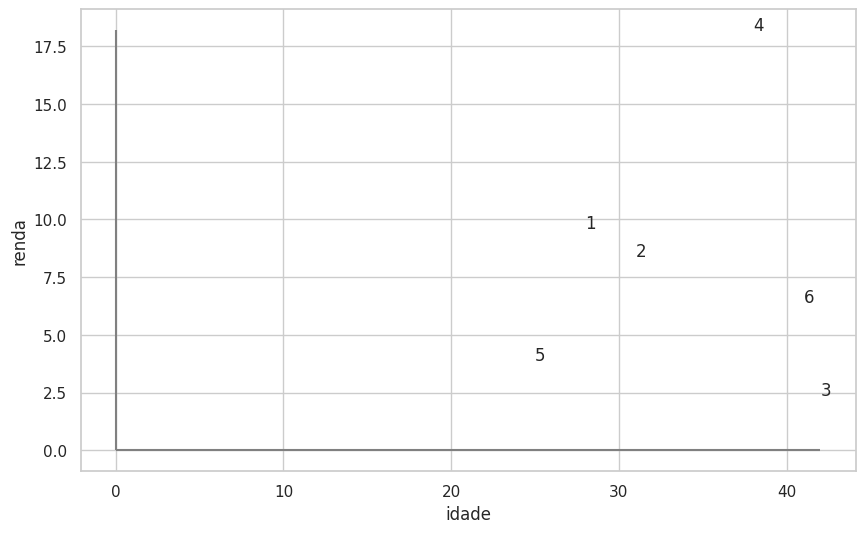

In [3]:
# diagrama de dispersão identificando os índices
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(dados['idade'], dados['renda'], s=0)
for i, txt in enumerate(dados.index):
    ax.annotate(dados['individuo'][i], (dados['idade'][i], dados['renda'][i]))
plt.xlabel("idade")
plt.ylabel("renda")
plt.hlines(0, 0, dados.idade.max(), color='gray')
plt.vlines(0, 0, dados.renda.max(), color='gray');

## Análise de agrupamento hierárquico

In [4]:
# definindo os rótulos dos dados
dados.index = dados['individuo']    # para o rótulo de cada linha ser o número 1, 2, 3, 4, 5 ou 6
dados = dados.drop('individuo', axis=1)  # retirar coluna 'individuo', que está redundante

In [5]:
X = dados.copy()

In [6]:
X

,renda,idade
individuo,,
1,9.6,28
2,8.4,31
3,2.4,42
4,18.2,38
5,3.9,25
6,6.4,41


Comparação entre os métodos:

Se outro método de agrupamento for escolhido, basta alterar o parâmetro 'method' na função linkage na célula abaixo:

Vizinho mais próximo:

In [7]:
Z = linkage(X, method='single',)
# method='single' (vizinho + próximo)
# 'complete' (vizinho + distante)
# 'average' (distância média)
# 'weighted '(also called WPGMA)
# 'centroid'
# 'median'
# 'ward'

In [8]:
# distâncias
# Z

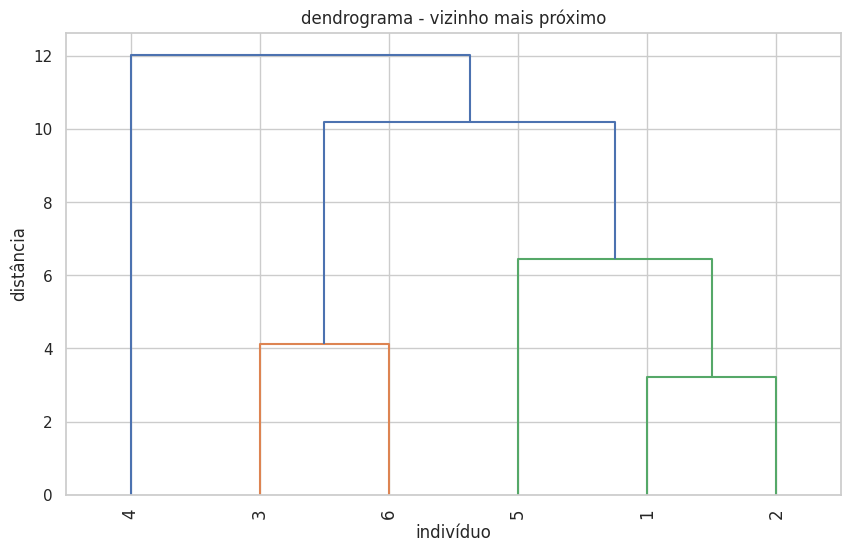

In [9]:
# obter o dendrograma de forma mais automática - função dendrogram
plt.figure(figsize=(10, 6))
plt.title('dendrograma - vizinho mais próximo')
plt.xlabel('indivíduo')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotação do eixo
    leaf_font_size=12.,  # tamanho da fonte
    labels=dados.index, # rótulos do eixo x
)
plt.show()

Vizinho mais distante:

In [10]:
Z = linkage(X, method='complete')
# 'single', 'complete', 'average', 'centroid', 'ward'

In [11]:
# distâncias
# Z

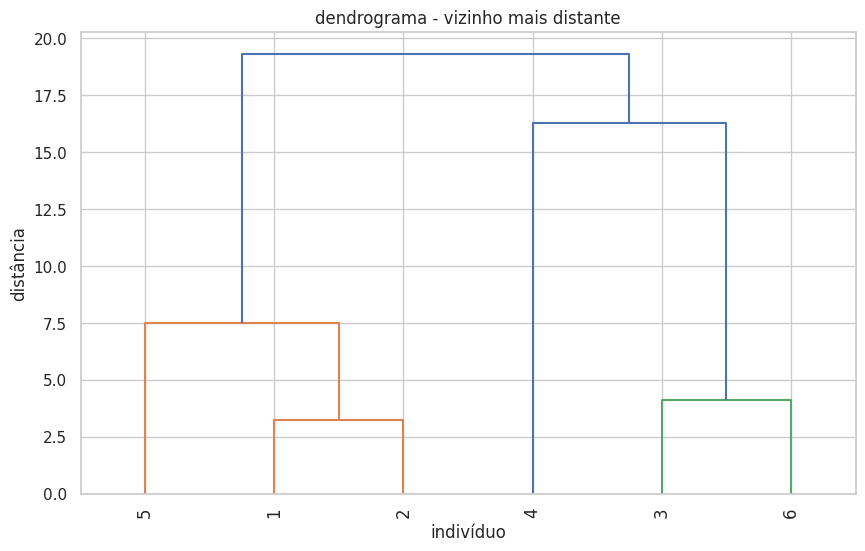

In [12]:
# obter o dendrograma de forma mais automática - função dendrogram
plt.figure(figsize=(10, 6))
plt.title('dendrograma - vizinho mais distante')
plt.xlabel('indivíduo')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotação do eixo
    leaf_font_size=12.,  # tamanho da fonte
    labels=dados.index, # rótulos do eixo x
)
plt.show()

Distância média:

In [13]:
Z = linkage(X, method='average')
# 'single', 'complete', 'average', 'centroid', 'ward'

In [14]:
# distâncias
# Z

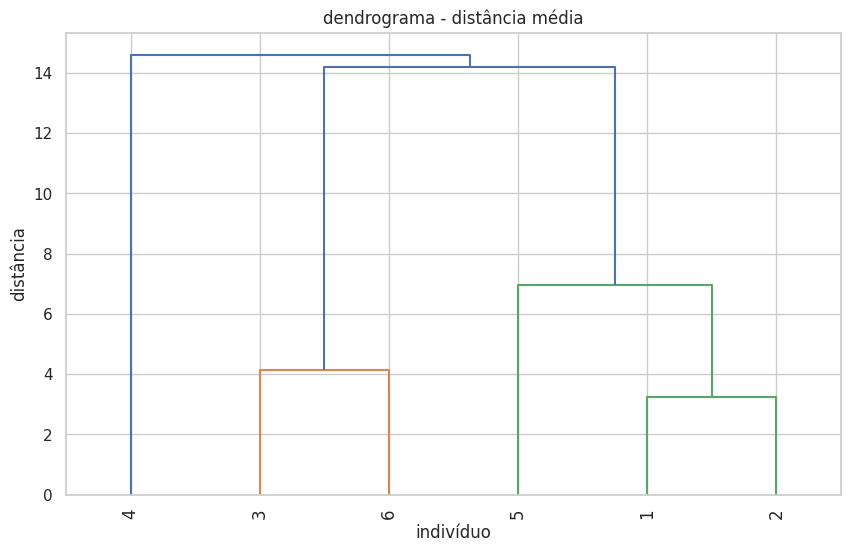

In [15]:
# obter o dendrograma de forma mais automática - função dendrogram
plt.figure(figsize=(10, 6))
plt.title('dendrograma - distância média')
plt.xlabel('indivíduo')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotação do eixo
    leaf_font_size=12.,  # tamanho da fonte
    labels=dados.index, # rótulos do eixo x
)
plt.show()

Centroide:

In [16]:
Z = linkage(X, method='centroid')
# 'single', 'complete', 'average', 'centroid', 'ward'

In [17]:
# distâncias
# Z

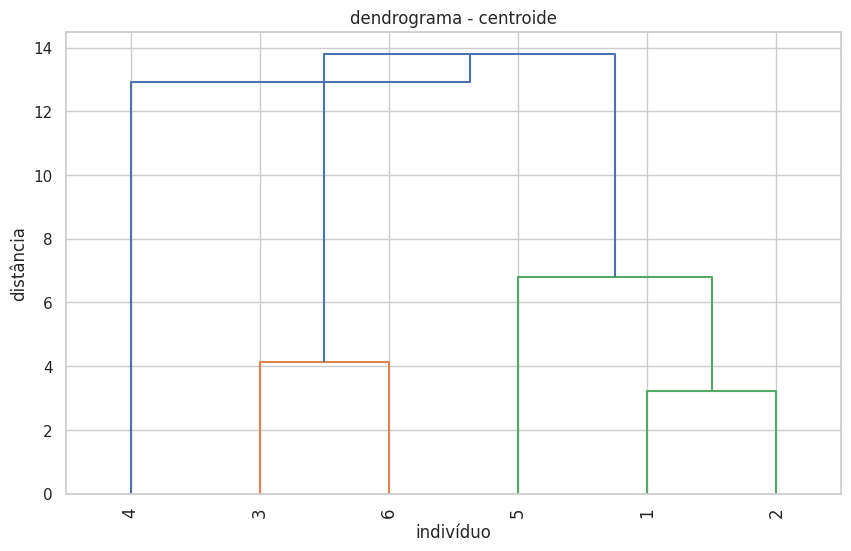

In [18]:
# obter o dendrograma de forma mais automática - função dendrogram
plt.figure(figsize=(10, 6))
plt.title('dendrograma - centroide')
plt.xlabel('indivíduo')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotação do eixo
    leaf_font_size=12.,  # tamanho da fonte
    labels=dados.index, # rótulos do eixo x
)
plt.show()

Ward:

In [19]:
Z = linkage(X, method='ward')
# 'single', 'complete', 'average', 'centroid', 'ward'

In [20]:
# distâncias
# Z

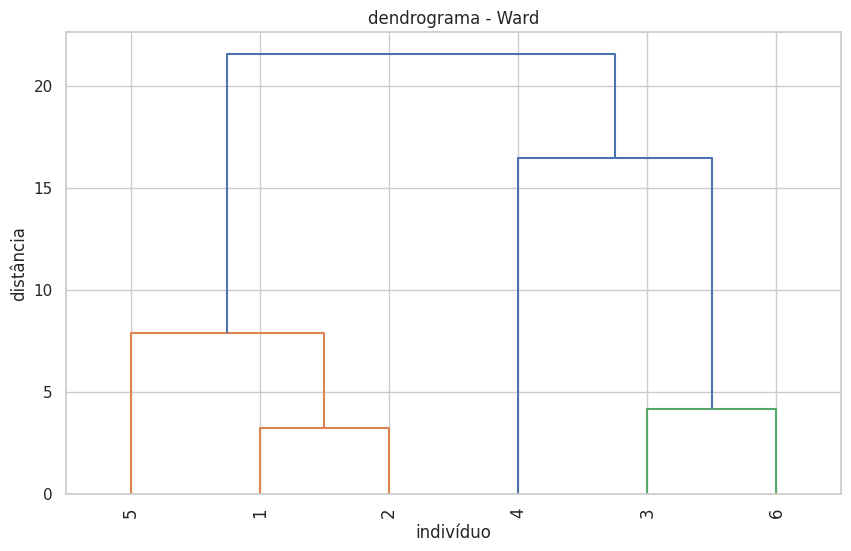

In [21]:
# obter o dendrograma de forma mais automática - função dendrogram
plt.figure(figsize=(10, 6))
plt.title('dendrograma - Ward')
plt.xlabel('indivíduo')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotação do eixo
    leaf_font_size=12.,  # tamanho da fonte
    labels=dados.index, # rótulos do eixo x
)
plt.show()

## Método escolhido: Ward

Todos os métodos deram resultados parecidos. A observação 4 é claramente um *outlier*, pois é sempre uma das últimas a ser incluída em um grupo.

In [22]:
Z = linkage(X, method='ward')
# 'single', 'complete', 'average', 'centroid', 'ward'

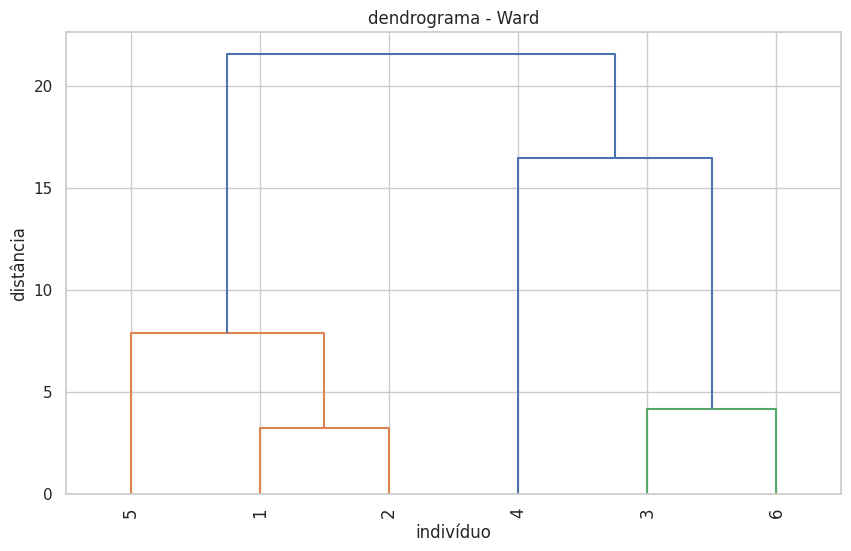

In [23]:
# obter o dendrograma de forma mais automática - função dendrogram
plt.figure(figsize=(10, 6))
plt.title('dendrograma - Ward')
plt.xlabel('indivíduo')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotação do eixo
    leaf_font_size=12.,  # tamanho da fonte
    labels=X.index, # rótulos do eixo x
)
plt.show()

Após escolhido o método de agrupamento, prosseguir com a análise:


In [24]:
# definir a distância de corte baseando no dendrograma
max_d = 14

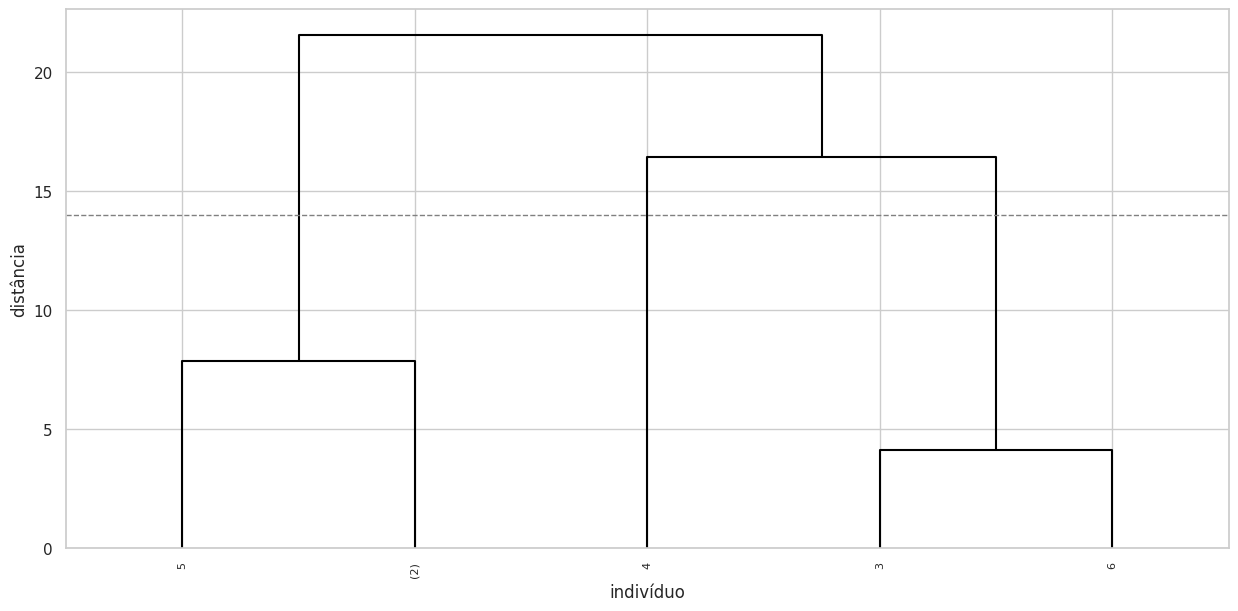

In [25]:
# dendrograma com mais opções
# mostra o ponto de corte na distância max_d
fig, ax = plt.subplots(figsize=(15, 7))
ax = dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar apenas os p últimos grupos formados
    p=5,  # quantos passos mostrar
    show_leaf_counts=True,  # mostrar quantas observações há em cada grupo entre parênteses
    leaf_rotation=90., # rotação
    leaf_font_size=8., # tamanho da fonte
    labels=dados.index, # rótulos do eixo x
    show_contracted=True,  # to get a distribution impression in truncated branches,
    above_threshold_color='black',
    color_threshold=0.1, # para que todas as linhas sejam da mesma cor
    # color_threshold=max_d, # para que os grupos fiquem com cores diferentes
)
plt.axhline(y=max_d, c='grey', lw=1, linestyle='dashed')
plt.xlabel('indivíduo')
plt.ylabel('distância');

In [26]:
grupos = cut_tree(Z, height=max_d)

In [27]:
# incluir no dataframe de dados as informações sobre a qual grupo cada observação pertence
dados['grupo'] = grupos
dados

,renda,idade,grupo
individuo,,,
1,9.6,28,0
2,8.4,31,0
3,2.4,42,1
4,18.2,38,2
5,3.9,25,0
6,6.4,41,1


In [28]:
# média dos grupos - todas as variáveis
# inclusive as não utilizadas para agrupar
dados.groupby('grupo').mean()

,renda,idade
grupo,,
0,7.3,28.0
1,4.4,41.5
2,18.2,38.0


In [29]:
# mediana das variáveis para cada grupo
dados.groupby('grupo').median()

,renda,idade
grupo,,
0,8.4,28.0
1,4.4,41.5
2,18.2,38.0


### As observações de cada grupo

In [30]:
grupo0 = dados.query('grupo == 0').index
list(grupo0)

[1, 2, 5]

In [31]:
grupo1 = dados.query('grupo == 1').index
list(grupo1)

[3, 6]

In [32]:
grupo2 = dados.query('grupo == 2').index
list(grupo2)

[4]

### ACP usando a matriz de correlações - para possibilitar a construção de gráficos

Neste caso não era necessário, pois só há $p=2$ variáveis e conseguimos fazer o diagrama de dispersão idade x renda.

De qualquer forma, construiremos o diagrama de dispersão de CP1 x CP2.

In [33]:
pca = PCA(random_state=1)
resultado_pca = pca.fit_transform(scale(X))   # scale(X) padroniza os dados, como se usássemos a matriz R
# armazenar resultados dos componentes principais para gerar o diagrama de dispersão dos grupos
resultado = pd.DataFrame({'cp1': resultado_pca[:, 0], 'cp2': resultado_pca[:, 1]}, index=X.index)

In [34]:
# coeficientes dos CPs (autovetores)
# cada linha é um CP
pca.components_

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [35]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 52.68, 100.  ])

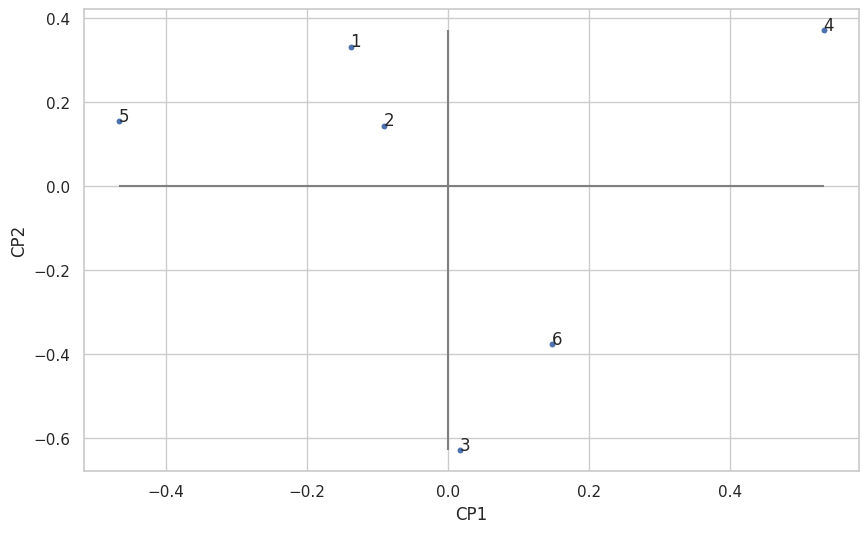

In [36]:
# diagrama de dispersão dos escores (padronizados) dos dois primeiros CPs
# rótulos: os índices dos indivíduos
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
xs = resultado.iloc[:,0]
ys = resultado.iloc[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
xx = xs*scalex
yy = ys*scaley
ax.scatter(xx, yy,s=5, linewidths=2)
plt.xlabel('CP1', fontsize=12)
plt.ylabel('CP2', fontsize=12)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (xx.iloc[i], yy.iloc[i]))
plt.hlines(0, xx.min(), xx.max(), color='gray')
plt.vlines(0, yy.min(), yy.max(), color='gray');

In [37]:
# incluir no resultado dos escores dos dois primeiros CPs a informação sobre os grupos obtidos
resultado['grupo'] = grupos
resultado['obs'] = resultado.index

In [38]:
# diagrama de dispersão dos CPs usando altair

g = alt.Chart(resultado, height=300, width=450).mark_text().encode(
    alt.X('cp1', scale=alt.Scale(domain=[resultado.cp1.min(), resultado.cp1.max()]), axis=alt.Axis(title='CP1')),
    alt.Y('cp2', scale=alt.Scale(domain=[resultado.cp2.min(), resultado.cp2.max()]), axis=alt.Axis(title='CP2')),
    text='obs',
    color=alt.Color('grupo:O', scale=alt.Scale(scheme='set1'))
)
# eixo x = 0
bar_x = alt.Chart(pd.DataFrame({'zero': [0]})).mark_rule(color='gray').encode(
    x='zero:Q'
)
# eixo y = 0
bar_y = alt.Chart(pd.DataFrame({'zero': [0]})).mark_rule(color='gray').encode(
    y='zero:Q'
)
g + bar_x + bar_y

alt.LayerChart(...)

# Dados das empresas

In [39]:
# ganho bruto - B (X1)
# ganho líquido - L (X2)
# patrimônio acumulado - P (X3)
dados = pd.DataFrame({'B': [9893, 8776, 13572, 6455, 5129, 5432, 3807, 3423, 3708, 3294, 5433, 6287],
                  'L': [564, 389, 1103, 743, 203, 215, 385, 187, 127, 297, 432, 451],
                  'P': [17689, 17359, 18597, 8745, 14397, 3467, 4679, 6754, 2275, 6754, 5589, 8972]})
dados

,B,L,P
0,9893,564,17689
1,8776,389,17359
2,13572,1103,18597
3,6455,743,8745
4,5129,203,14397
5,5432,215,3467
6,3807,385,4679
7,3423,187,6754
8,3708,127,2275
9,3294,297,6754


## Análise de agrupamento hierárquico

In [40]:
X = dados.copy()
X.index = dados.index

Comparação entre os métodos:

Se outro método de agrupamento for escolhido, basta alterar o parâmetro 'method' na função linkage na célula abaixo:

Vizinho mais próximo:

In [41]:
Z = linkage(X, method='single')
# method='single' (vizinho + próximo)
# 'complete' (vizinho + distante)
# 'average' (distância média)
# 'weighted '(also called WPGMA)
# 'centroid'
# 'median'
# 'ward'

In [42]:
# distâncias
# Z

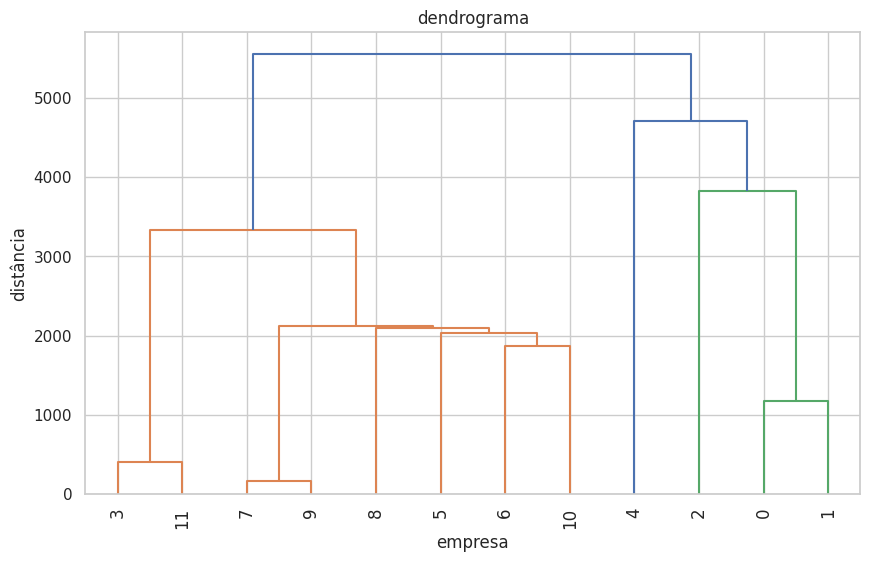

In [43]:
# obter o dendrograma de forma mais automática - função dendrogram
plt.figure(figsize=(10, 6))
plt.title('dendrograma')
plt.xlabel('empresa')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotação do eixo
    leaf_font_size=12.,  # tamanho da fonte
)
plt.show()

Vizinho mais distante:

In [44]:
Z = linkage(X, method='complete')
# 'single', 'complete', 'average', 'centroid', 'ward'

In [45]:
# distâncias
# Z

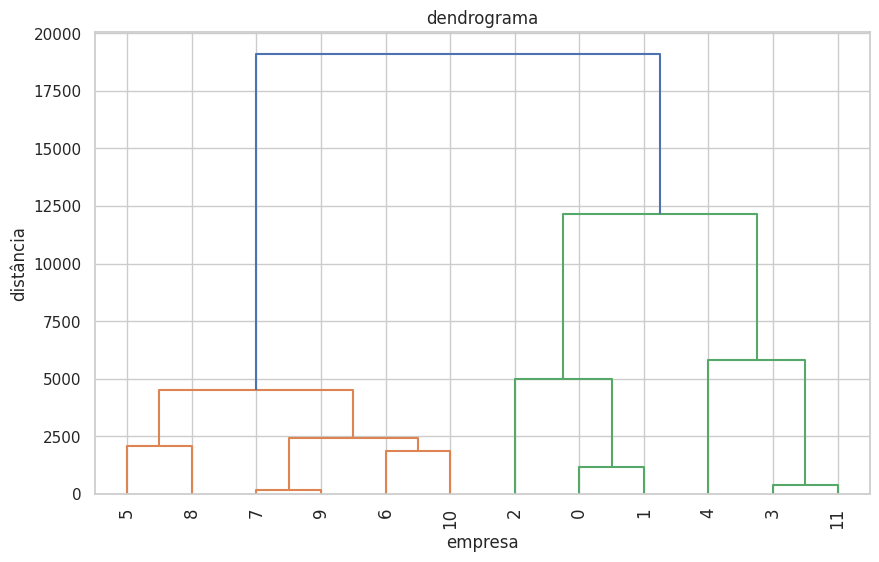

In [46]:
# obter o dendrograma de forma mais automática - função dendrogram
plt.figure(figsize=(10, 6))
plt.title('dendrograma')
plt.xlabel('empresa')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotação do eixo
    leaf_font_size=12.,  # tamanho da fonte
)
plt.show()

Distância média:

In [47]:
Z = linkage(X, method='average')
# 'single', 'complete', 'average', 'centroid', 'ward'

In [48]:
# distâncias
# Z

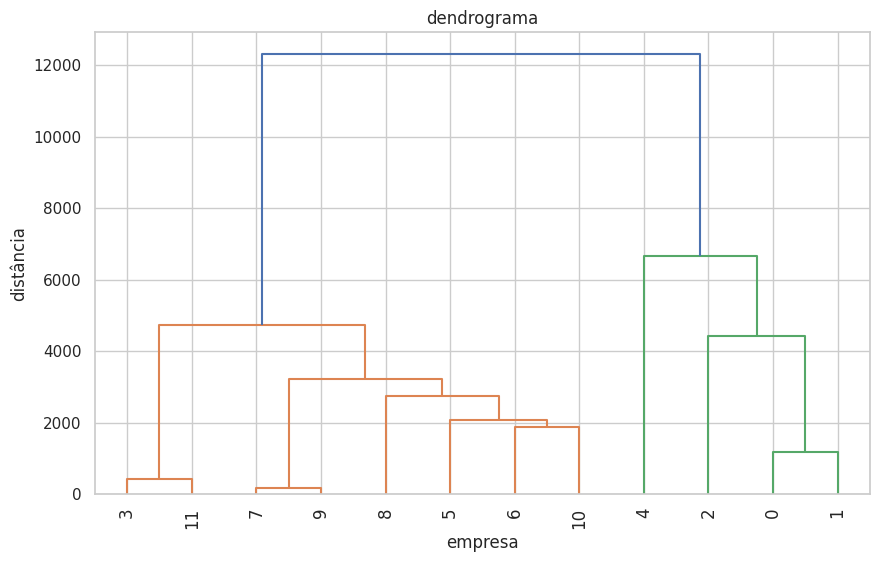

In [49]:
# obter o dendrograma de forma mais automática - função dendrogram
plt.figure(figsize=(10, 6))
plt.title('dendrograma')
plt.xlabel('empresa')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotação do eixo
    leaf_font_size=12.,  # tamanho da fonte
)
plt.show()

Centroide:

In [50]:
Z = linkage(X, method='centroid')
# 'single', 'complete', 'average', 'centroid', 'ward'

In [51]:
# distâncias
# Z

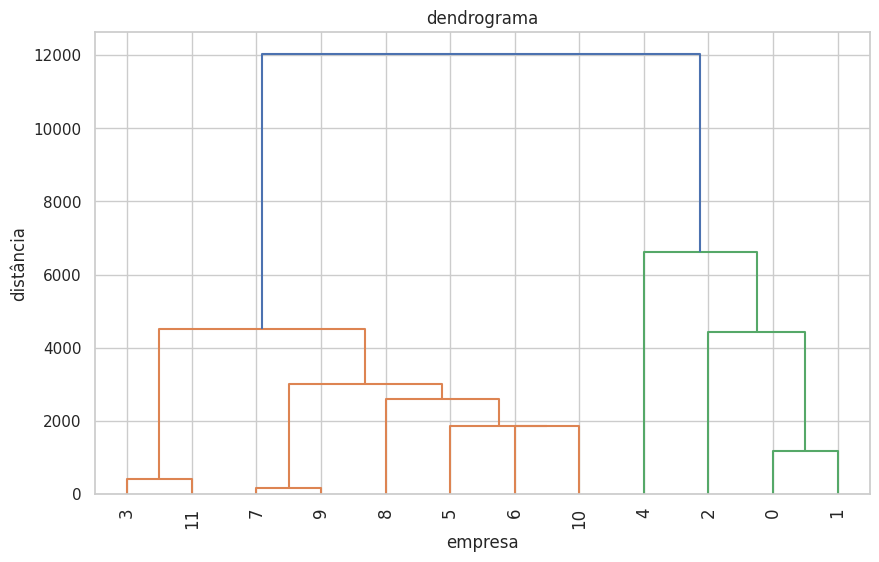

In [52]:
# obter o dendrograma de forma mais automática - função dendrogram
plt.figure(figsize=(10, 6))
plt.title('dendrograma')
plt.xlabel('empresa')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotação do eixo
    leaf_font_size=12.,  # tamanho da fonte
)
plt.show()

Ward:

In [53]:
Z = linkage(X, method='ward')
# 'single', 'complete', 'average', 'centroid', 'ward'

In [54]:
# distâncias
# Z

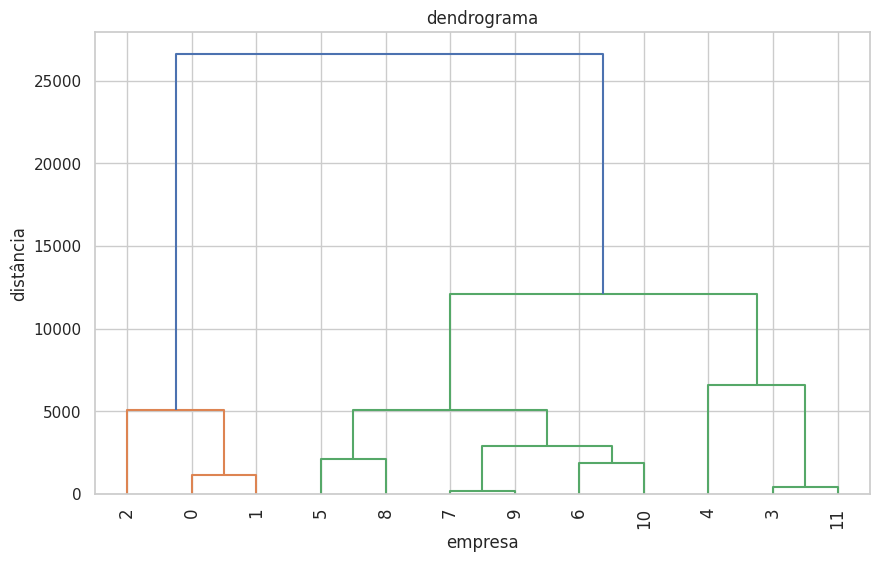

In [55]:
# obter o dendrograma de forma mais automática - função dendrogram
plt.figure(figsize=(10, 6))
plt.title('dendrograma')
plt.xlabel('empresa')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotação do eixo
    leaf_font_size=12.,  # tamanho da fonte
)
plt.show()

## Método escolhido:

In [73]:
Z = linkage(X, method='ward')
# 'single', 'complete', 'average', 'centroid', 'ward'

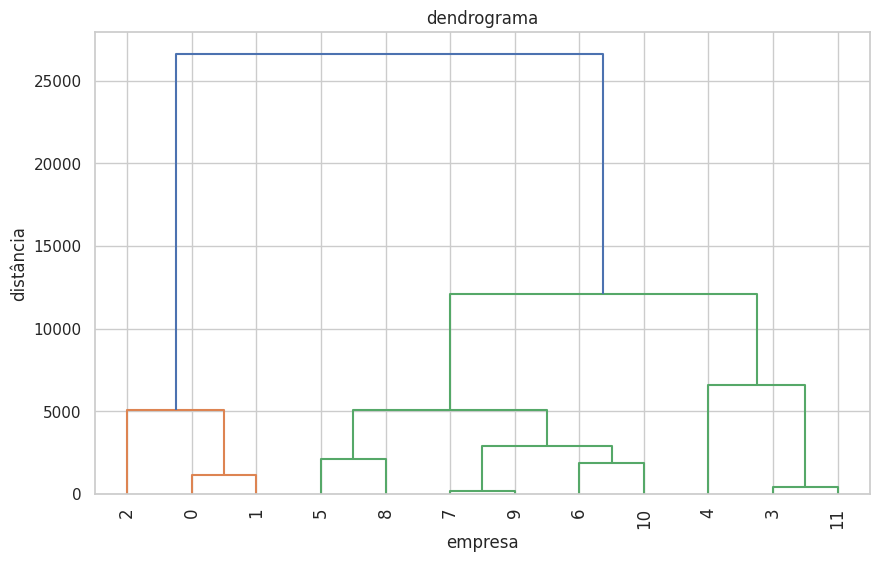

In [74]:
# obter o dendrograma de forma mais automática - função dendrogram
plt.figure(figsize=(10, 6))
plt.title('dendrograma')
plt.xlabel('empresa')
plt.ylabel('distância')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotação do eixo
    leaf_font_size=12.,  # tamanho da fonte
)
plt.show()

Após escolhido o método de agrupamento, prosseguir com a análise:


In [75]:
# definir a distância de corte baseando no dendrograma
max_d = 10000

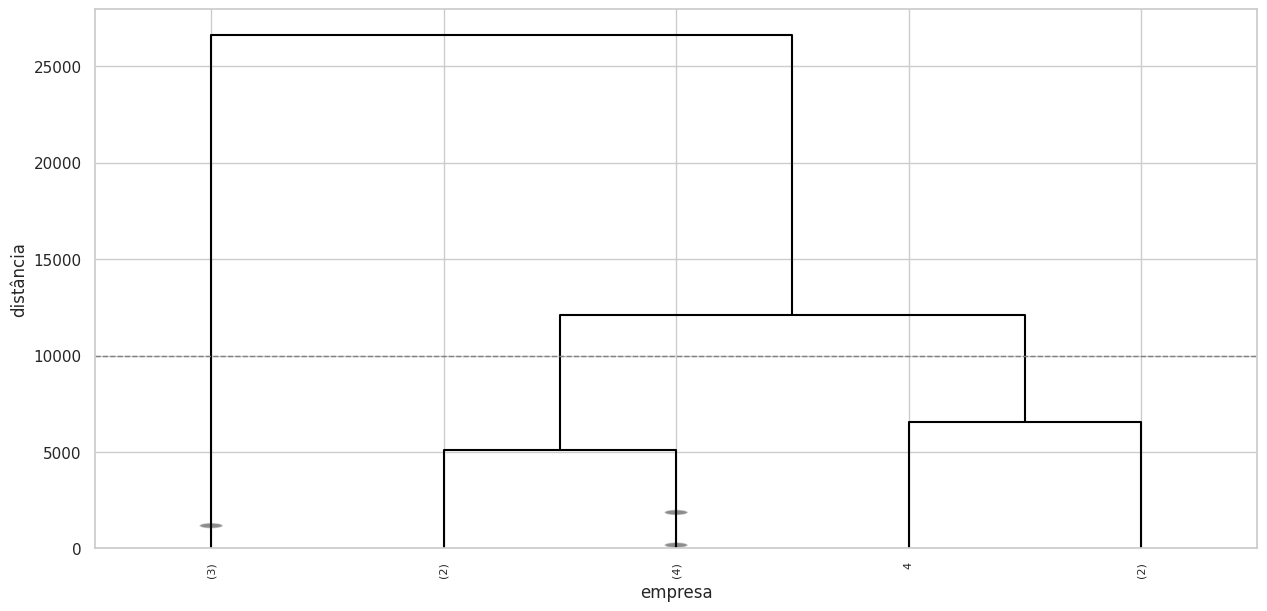

In [76]:
# dendrograma com mais opções
# mostra o ponto de corte na distância max_d
fig, ax = plt.subplots(figsize=(15, 7))
ax = dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar apenas os p últimos grupos formados
    p=5,  # quantos passos mostrar
    show_leaf_counts=True,  # mostrar quantas observações há em cada grupo entre parênteses
    leaf_rotation=90., # rotação
    leaf_font_size=8., # tamanho da fonte
    labels=dados.index, # rótulos do eixo x
    show_contracted=True,  # to get a distribution impression in truncated branches,
    above_threshold_color='black',
    color_threshold=0.1, # para que todas as linhas sejam da mesma cor
    # color_threshold=max_d, # para que os grupos fiquem com cores diferentes
)
plt.axhline(y=max_d, c='grey', lw=1, linestyle='dashed')
plt.xlabel('empresa')
plt.ylabel('distância');

In [77]:
grupos = cut_tree(Z, height=max_d)

In [78]:
# incluir no dataframe de dados as informações sobre a qual grupo cada observação pertence
dados['grupo'] = grupos
# dados

In [79]:
# média dos grupos - todas as variáveis
# inclusive as não utilizadas para agrupar
dados.groupby('grupo').mean()

,B,L,P
grupo,,,
0,10747.000000,685.333333,17881.666667
1,5957.000000,465.666667,10704.666667
2,4182.833333,273.833333,4919.666667


In [80]:
# mediana das variáveis para cada grupo
dados.groupby('grupo').median()

,B,L,P
grupo,,,
0,9893.0,564.0,17689.0
1,6287.0,451.0,8972.0
2,3757.5,256.0,5134.0


Caracterização dos grupos:

* Grupo 0:
* Grupo 1:
* Grupo 2:
*  
*  


### As observações de cada grupo

In [81]:
grupo0 = dados.query('grupo == 0').index
list(grupo0)

[0, 1, 2]

In [82]:
grupo1 = dados.query('grupo == 1').index
list(grupo1)

[3, 4, 11]

In [83]:
grupo2 = dados.query('grupo == 2').index
list(grupo2)

[5, 6, 7, 8, 9, 10]

### ACP usando a matriz de correlações - para possibilitar a construção de gráficos

In [84]:
pca = PCA(random_state=1)
resultado_pca = pca.fit_transform(scale(X))   # scale(X) padroniza os dados, como se usássemos a matriz R
# armazenar resultados dos componentes principais para gerar o diagrama de dispersão dos grupos
resultado = pd.DataFrame({'cp1': resultado_pca[:, 0], 'cp2': resultado_pca[:, 1]})

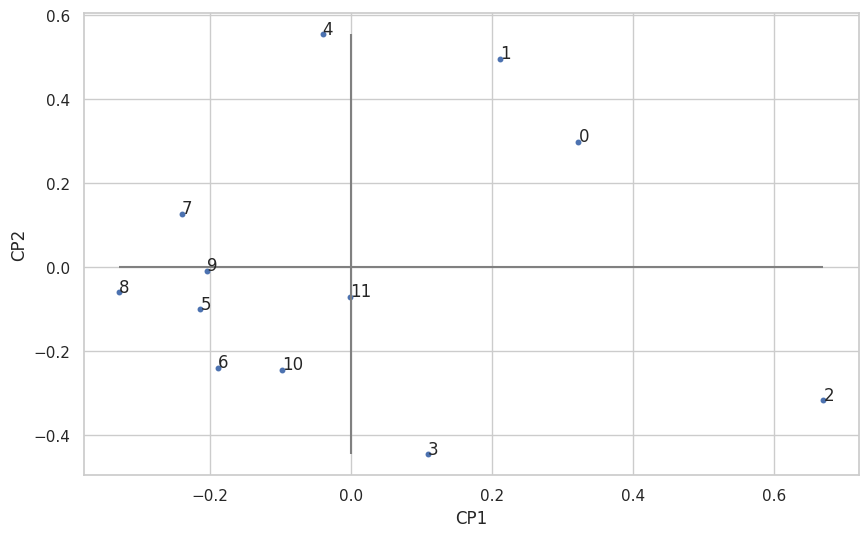

In [85]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
xs = resultado.iloc[:,0]
ys = resultado.iloc[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
xx = xs*scalex
yy = ys*scaley
ax.scatter(xx, yy,s=5, linewidths=2)
plt.xlabel('CP1', fontsize=12)
plt.ylabel('CP2', fontsize=12)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (xx[i], yy[i]))
plt.hlines(0, xx.min(), xx.max(), color='gray')
plt.vlines(0, yy.min(), yy.max(), color='gray');

In [86]:
# incluir no resultado dos escores dos dois primeiros CPs a informação sobre os grupos obtidos
resultado['grupo'] = grupos
resultado['obs'] = resultado.index

In [87]:
# resultado

In [88]:
# diagrama de dispersão dos CPs usando altair
g = alt.Chart(resultado, height=400, width=500).mark_text().encode(
    alt.X('cp1', scale=alt.Scale(domain=[resultado.cp1.min(), resultado.cp1.max()]), axis=alt.Axis(title='CP1')),
    alt.Y('cp2', scale=alt.Scale(domain=[resultado.cp2.min(), resultado.cp2.max()]), axis=alt.Axis(title='CP2')),
    text='obs',
    color=alt.Color('grupo:O', scale=alt.Scale(scheme='set1'))
)
# eixo x = 0
bar_x = alt.Chart(pd.DataFrame({'zero': [0]})).mark_rule(color='gray').encode(
    x='zero:Q'
)
# eixo y = 0
bar_y = alt.Chart(pd.DataFrame({'zero': [0]})).mark_rule(color='gray').encode(
    y='zero:Q'
)
g + bar_x + bar_y

alt.LayerChart(...)

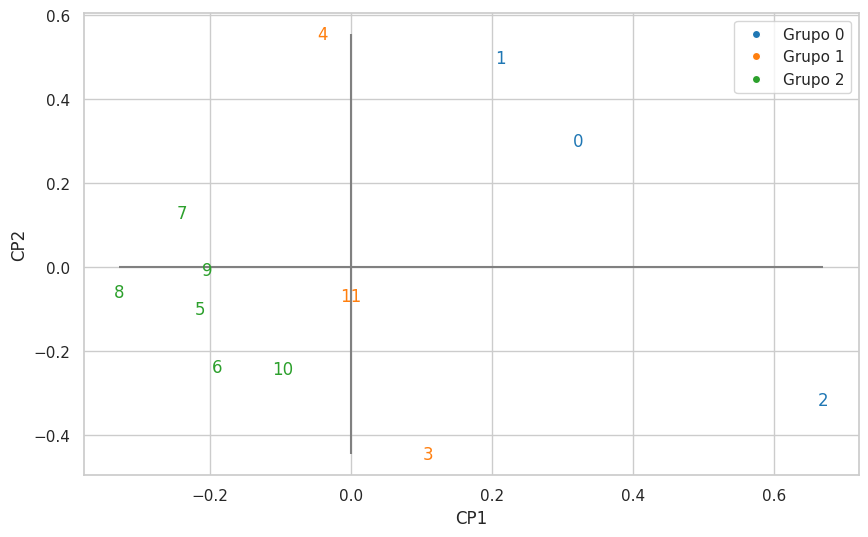

In [89]:
# usando matplotlib

fig, ax = plt.subplots(figsize=(10, 6))
# escores dos dois primeiros CPs
xs = resultado.iloc[:, 0]
ys = resultado.iloc[:, 1]
# padronizar os valores dos CPs
scalex = 1.0 / (xs.max() - xs.min())
scaley = 1.0 / (ys.max() - ys.min())
xx = xs * scalex
yy = ys * scaley
# pegar as informações de grupos
groups = resultado['grupo']
# diagrama de dispersão dos escores
ax.scatter(xx, yy, s=0)
# nomes dos eixos
plt.xlabel('CP1', fontsize=12)
plt.ylabel('CP2', fontsize=12)
# colocar o índice da observação em cada ponto e com cores diferentes para os grupos
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (xx[i], yy[i]), ha='center', va='center', color=cm.tab10(groups[i]))

plt.hlines(0, xx.min(), xx.max(), color='gray')
plt.vlines(0, yy.min(), yy.max(), color='gray')
# criar legenda
unique_groups = resultado['grupo'].unique()
legend_labels = [f'Grupo {group}' for group in unique_groups]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cm.tab10(group)) for group in unique_groups]
ax.legend(legend_handles, legend_labels)

plt.show()